* Problem - Multi-class Classification
* Dataset - Iris
* Model - Manually Backpropagation (No tensorflow, No Keras)
* Network layers are like  4 -> 6 -> 3

In [113]:
import numpy as np # algebra
import pandas as pd # data processing
import seaborn as sns # visualization
import matplotlib.pyplot as plt # plot figures
import time as t # record time
from sklearn.model_selection import train_test_split # splitting dataset into train test
from sklearn.preprocessing import OneHotEncoder # convert target into one hot encoding
from sklearn.preprocessing import MinMaxScaler # normalization
%matplotlib inline

In [114]:
# load iris database
data = pd.read_csv('/content/drive/MyDrive/CV/Iris.csv')
data.sample(n=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
28,29,5.2,3.4,1.4,0.2,Iris-setosa
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
126,127,6.2,2.8,4.8,1.8,Iris-virginica
5,6,5.4,3.9,1.7,0.4,Iris-setosa
108,109,6.7,2.5,5.8,1.8,Iris-virginica


In [115]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X = np.array(X)

# define min max scaler
scaler = MinMaxScaler()
# transform data - normalization
X = scaler.fit_transform(X)

# Convert target variable into categorical
one_hot_encoder = OneHotEncoder(sparse=False)

y = data.Species
y = one_hot_encoder.fit_transform(np.array(y).reshape(-1, 1))

In [116]:
print(f'Separated Inputs and Labels into X and y matrix')
print(f'Input is : {X.shape}')
print(f'Label is : {y.shape}')

Separated Inputs and Labels into X and y matrix
Input is : (150, 4)
Label is : (150, 3)


In [117]:
#Split training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(f'Divided Inputs and Labels for training and testing respectively')
print(f'X_train - {X_train.shape}')
print(f'X_test - {X_test.shape}')
print(f'y_train - {y_train.shape}')
print(f'y_test - {y_test.shape}')

Divided Inputs and Labels for training and testing respectively
X_train - (120, 4)
X_test - (30, 4)
y_train - (120, 3)
y_test - (30, 3)


In [118]:
total_independent_variable = X.shape[1]
total_hidden_layer = 1
total_weights_matrix = total_hidden_layer + 1 
hidden_layer_neurons = 6
output_layer_neurons = 3
epochs = 1000
learning_rate = 0.01
loss_list = []

In [119]:
# setup weight matrix
weights_for_hidden_layer_1 = np.random.rand(total_independent_variable, hidden_layer_neurons) 
weights_for_output_layer = np.random.rand(hidden_layer_neurons, output_layer_neurons) 

In [120]:
print(f'Total independent variable/ features : {total_independent_variable}')
print(f'\nInput layer size : {total_independent_variable}')
print(f'Total Hidden layers/inner layers  : {total_hidden_layer}')
print(f'Total weight matrix/ Proper Hidden layers : {total_weights_matrix}')
print(f'Epochs : {epochs}')

print(f'\nWeights for hidden layer 1 shape : {weights_for_hidden_layer_1.shape}')
print(f'Weights for output layer shape : {weights_for_output_layer.shape}')

Total independent variable/ features : 4

Input layer size : 4
Total Hidden layers/inner layers  : 1
Total weight matrix/ Proper Hidden layers : 2
Epochs : 1000

Weights for hidden layer 1 shape : (4, 6)
Weights for output layer shape : (6, 3)


In [121]:
def sigmoid(s):
    s=np.array(s,dtype=np.float32)
    sig = 1.0/(1.0 + np.exp(-s))
    return sig

def sigmoid_derivative(s):
    return s * (1.0 - s)

def feedforward(inp):
    output_of_hl1 = sigmoid(np.dot(inp, weights_for_hidden_layer_1))
    y_hat = sigmoid(np.dot(output_of_hl1, weights_for_output_layer))
    return y_hat,output_of_hl1

training_time = t.time()
#training the NN epochs times
for i in range(epochs): 
    #feed forward
    y_hat,output_of_hl1 = feedforward(X_train)
    
    #print loss after specific loop
    training_mse = np.average((y_hat - y_train) ** 2)
    loss_list.append(training_mse)     
    
    correct_train = 0
    if(i % 80 == 0):
      print("Epoch {}".format(i))
      # Compare predicted and actual output 
      for r in range(len(X_train)):
        if(np.argmax(y_train[r]) == np.argmax(y_hat[r])):
          # Guessed correctly
          correct_train += 1
      print(f'Training Accuracy: {(round((correct_train / len(X_train)*100),2))}% and loss: {round(training_mse,5)}')

    loss = (y_train - y_hat)
    
    #back propagation    
    output_layer_delta = loss * sigmoid_derivative(y_hat)
    weights_for_output_layer_old = weights_for_output_layer
    weights_for_output_layer = weights_for_output_layer + (learning_rate * np.dot(output_of_hl1.T, output_layer_delta))
    
    loss_for_hl1 = np.dot(output_layer_delta, weights_for_output_layer_old.T)
    hl1_delta = loss_for_hl1 * sigmoid_derivative(output_of_hl1)
    weights_for_hidden_layer_1_old = weights_for_hidden_layer_1
    weights_for_hidden_layer_1 = weights_for_hidden_layer_1 + (learning_rate * np.dot(X_train.T, hl1_delta))
    
print(f'\nTotal time taken to train points : {t.time()-training_time}')

Epoch 0
Training Accuracy: 31.67% and loss: 0.52015
Epoch 80
Training Accuracy: 34.17% and loss: 0.21791
Epoch 160
Training Accuracy: 65.83% and loss: 0.1988
Epoch 240
Training Accuracy: 65.83% and loss: 0.14839
Epoch 320
Training Accuracy: 65.83% and loss: 0.12414
Epoch 400
Training Accuracy: 70.83% and loss: 0.11507
Epoch 480
Training Accuracy: 75.83% and loss: 0.10999
Epoch 560
Training Accuracy: 87.5% and loss: 0.1063
Epoch 640
Training Accuracy: 90.0% and loss: 0.10322
Epoch 720
Training Accuracy: 91.67% and loss: 0.10046
Epoch 800
Training Accuracy: 93.33% and loss: 0.09785
Epoch 880
Training Accuracy: 93.33% and loss: 0.0953
Epoch 960
Training Accuracy: 94.17% and loss: 0.09277

Total time taken to train points : 0.10373520851135254


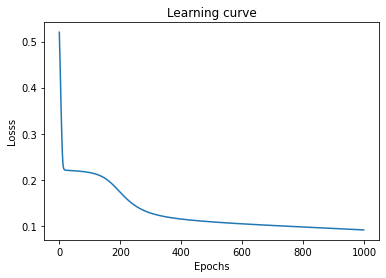

In [122]:
plt.xlabel('Epochs')
plt.ylabel('Losss')
plt.title('Learning curve')
plt.plot(loss_list)
plt.show()

In [123]:
# Testing accuracy

testing_time = t.time()

op,output_of_hl1 = feedforward(X_test)

correct = 0 

# Compare predicted and actual output 
for i in range(len(X_test)):
  if(np.argmax(y_test[i]) == np.argmax(op[i])):
    # Guessed correctly
    correct += 1

print(f'Testing accuracy : {round((correct / len(X_test)*100),2)}%')
print(f'Total time taken to test points : {t.time()-testing_time}')

Testing accuracy : 96.67%
Total time taken to test points : 0.002208232879638672
